In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/archive.zip -d /content/apparel-images-dataset

Streaming output truncated to the last 5000 lines.
  inflating: /content/apparel-images-dataset/brown_shoes/29c9bf50db194174be8c8dafa3373f3eb337bb2d.jpg  
  inflating: /content/apparel-images-dataset/brown_shoes/2b5552c967c7f406b1b780e9188cdbadcf4be6d1.jpg  
  inflating: /content/apparel-images-dataset/brown_shoes/2b802f7d6e2b73ed86924aa7a8a8c65e0b9661ca.jpg  
  inflating: /content/apparel-images-dataset/brown_shoes/2d202ed49ac15aeff75681b0d78c322c68852785.jpg  
  inflating: /content/apparel-images-dataset/brown_shoes/2df99267923b05486744f5fe59ffb9dbf0dce133.jpg  
  inflating: /content/apparel-images-dataset/brown_shoes/2e94cdf3e3020cad6ad91f01cf75264a270908c6.jpg  
  inflating: /content/apparel-images-dataset/brown_shoes/2e9ec5a783dd8eb88af84a2fa01dd44ec0837e19.jpg  
  inflating: /content/apparel-images-dataset/brown_shoes/2ee1746aacd7d31ab3a941934a11b9b34ae884bc.jpg  
  inflating: /content/apparel-images-dataset/brown_shoes/2f098f41527b7ef3404c1df984f775d21b10df15.jpg  
  inflating: 

In [ ]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import cv2
from glob import glob
from tqdm import tqdm
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization, AveragePooling2D, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping
from tensorflow.keras.applications import VGG19
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

In [ ]:
#Dataset:
import os
apparel_types = os.listdir("/content/apparel-images-dataset")
print (apparel_types)

['blue_shorts', 'red_pants', 'blue_dress', 'green_shoes', 'blue_pants', 'blue_shoes', 'black_dress', 'white_dress', 'white_shorts', 'brown_pants', 'brown_shoes', 'black_shirt', 'green_shorts', 'white_pants', 'blue_shirt', 'green_shirt', 'red_dress', 'black_shoes', 'red_shoes', 'brown_shorts', 'green_pants', 'white_shoes', 'black_shorts', 'black_pants']


In [ ]:
apparel_data = []

for item in apparel_types:
 all_apparel_data = all_apparels_test = [i for i in os.listdir('/content/apparel-images-dataset' + '/' +item)]
 for apparel in all_apparel_data:
    apparel_data.append((item, str('/content/apparel-images-dataset' + '/' +item) + '/' + apparel))
    print(apparel_data[:1])

Streaming output truncated to the last 5000 lines.
[('blue_shorts', '/content/apparel-images-dataset/blue_shorts/a2d6b23242e70b5aef6113576e0aeb97af4b9775.jpg')]
[('blue_shorts', '/content/apparel-images-dataset/blue_shorts/a2d6b23242e70b5aef6113576e0aeb97af4b9775.jpg')]
[('blue_shorts', '/content/apparel-images-dataset/blue_shorts/a2d6b23242e70b5aef6113576e0aeb97af4b9775.jpg')]
[('blue_shorts', '/content/apparel-images-dataset/blue_shorts/a2d6b23242e70b5aef6113576e0aeb97af4b9775.jpg')]
[('blue_shorts', '/content/apparel-images-dataset/blue_shorts/a2d6b23242e70b5aef6113576e0aeb97af4b9775.jpg')]
[('blue_shorts', '/content/apparel-images-dataset/blue_shorts/a2d6b23242e70b5aef6113576e0aeb97af4b9775.jpg')]
[('blue_shorts', '/content/apparel-images-dataset/blue_shorts/a2d6b23242e70b5aef6113576e0aeb97af4b9775.jpg')]
[('blue_shorts', '/content/apparel-images-dataset/blue_shorts/a2d6b23242e70b5aef6113576e0aeb97af4b9775.jpg')]
[('blue_shorts', '/content/apparel-images-dataset/blue_shorts/a2d6b23

In [ ]:
# Build a dataframe        
apparel_data_df = pd.DataFrame(data=apparel_data, columns=['apparel type', 'image'])
print(len(apparel_data_df))
print(apparel_data_df.head())
print(apparel_data_df.tail())

11385
  apparel type                                              image
0  blue_shorts  /content/apparel-images-dataset/blue_shorts/a2...
1  blue_shorts  /content/apparel-images-dataset/blue_shorts/0e...
2  blue_shorts  /content/apparel-images-dataset/blue_shorts/ba...
3  blue_shorts  /content/apparel-images-dataset/blue_shorts/e1...
4  blue_shorts  /content/apparel-images-dataset/blue_shorts/39...
      apparel type                                              image
11380  black_pants  /content/apparel-images-dataset/black_pants/ef...
11381  black_pants  /content/apparel-images-dataset/black_pants/56...
11382  black_pants  /content/apparel-images-dataset/black_pants/19...
11383  black_pants  /content/apparel-images-dataset/black_pants/e6...
11384  black_pants  /content/apparel-images-dataset/black_pants/62...


In [ ]:
# Image Exploratory Analysis
import numpy as np
apparel_data_df = apparel_data_df[apparel_data_df['apparel type'].map(apparel_data_df['apparel type'].value_counts()) > 750]
col_list =  list(apparel_data_df['apparel type'])
filter_apparel_type, counts = np.unique(col_list, return_counts=True)
print(filter_apparel_type)
apparel_count = apparel_data_df['apparel type'].value_counts()
print("Total number of apparels in the dataset: ", len(apparel_data_df))
print(apparel_data_df)
print("apparels in each category: ")
print(apparel_count)

['black_pants' 'black_shoes' 'blue_pants' 'red_dress' 'white_dress']
Total number of apparels in the dataset:  4053
      apparel type                                              image
1564    blue_pants  /content/apparel-images-dataset/blue_pants/deb...
1565    blue_pants  /content/apparel-images-dataset/blue_pants/62b...
1566    blue_pants  /content/apparel-images-dataset/blue_pants/c6d...
1567    blue_pants  /content/apparel-images-dataset/blue_pants/4c5...
1568    blue_pants  /content/apparel-images-dataset/blue_pants/b98...
...            ...                                                ...
11380  black_pants  /content/apparel-images-dataset/black_pants/ef...
11381  black_pants  /content/apparel-images-dataset/black_pants/56...
11382  black_pants  /content/apparel-images-dataset/black_pants/19...
11383  black_pants  /content/apparel-images-dataset/black_pants/e6...
11384  black_pants  /content/apparel-images-dataset/black_pants/62...

[4053 rows x 2 columns]
apparels in each ca

## Image Preprocessing

In [ ]:
import cv2
path_train = '/content/apparel-images-dataset'


im_size = 64

images = []
labels = []

for i in filter_apparel_type:
    data_path_train = path_train + '/'+ str(i)  # entered in 1st folder and then 2nd folder and then 3rd folder
    print(data_path_train)
    # # filenames = [i for i in os.listdir(data_path_train) if i.endswith('.JPG' or '.jpg' or '.png' or '.PNG')]
    filenames = [i for i in os.listdir(data_path_train)]
    print(filenames)  # will get the names of all images which ends with .jpg extension
    for f in filenames:
        img = cv2.imread(data_path_train + '/' + f)  # reading that image as array
        #print(img)  # will get the image as an array
        img = cv2.resize(img, (im_size, im_size))
        images.append(img)
        labels.append(i)

/content/apparel-images-dataset/black_pants
['d229b0c1dd2409723b492f9f33f31cff15e577a1.jpg', 'c86edb7c0e16e08a5c4d7c05f828c4191ac09479.jpg', '08c2027dce5c1788544d4904d1cecfddd60740d7.jpg', 'a5c6ff11e94056f57545ffdc3a8bd7fcae343c61.jpg', '0ece68d17000b31ff47b1a295ff3bf689a123ad9.jpg', '0553218c16588820d70b382723c1a1461fe114c6.jpg', '01551a9ce00e3940ccfc79627c19b3b89fdab741.jpg', '89d05c0ff37e6797d02656b2e68f7aba5082b27e.jpg', '6bacbfe1f9910663b9369bea64e6cecd6341cde8.jpg', '36431ea6441a5857b8d1412b63de6ed5e0e973c8.jpg', 'd5e66f3bd65b82997844a9b17046c029ddde7e77.jpg', 'e0d3ced8b6aa86e2a5f194a2d0d4ccab921fe8cd.jpg', 'b120d545e9a0022d8b8471f4025bdd4e72524bf7.jpg', 'ce68d0189603d7a1126687bbe7470bf324699493.jpg', 'c29b4c8dd83d356d3c1517661f5dcf1947fd2065.jpg', '6e524df4b1751518c5264dbe85ee8379c29959fc.jpg', '760dbc6962c4f67f37e083761762d082e929987b.jpg', '57c721c084c71129a16839abccff86095dac7a07.jpg', '0ce3f0ec51fa7988c53a57cefe926b51bacf187c.jpg', 'd2dcb28a35fe3f4cfdec57c25c76382ca8e207ed.j

In [ ]:
# Transform the image array to a numpy type

images = np.array(images) # Converting List into array - Since Deep Learning accepts only array as the input shape

images.shape

(4053, 64, 64, 3)

In [ ]:
images = images.astype('float32') / 255.0  # convert images into numerical values

In [ ]:
images.shape

(4053, 64, 64, 3)

In [ ]:
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
y=apparel_data_df['apparel type'].values
print(y[:5])

['blue_pants' 'blue_pants' 'blue_pants' 'blue_pants' 'blue_pants']


In [ ]:
# for y
y_labelencoder = LabelEncoder()
y = y_labelencoder.fit_transform (y)
print(len(y))
print (y)

4053
[2 2 2 ... 0 0 0]


In [ ]:
y=y.reshape(-1,1)
print(y)

[[2]
 [2]
 [2]
 ...
 [0]
 [0]
 [0]]


In [ ]:
onehotencoder = OneHotEncoder(sparse=False)  
Y= onehotencoder.fit_transform(y)
Y.shape 

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


(4053, 5)

### **Train-Test Split**

In [ ]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split


images, Y = shuffle(images, Y, random_state=1)

X_train, X_val, Y_train, Y_val = train_test_split(images, Y, test_size=0.2, random_state=10,stratify = Y)

In [ ]:
print(X_train.shape)
print(X_val.shape)
print(Y_train.shape)
print(Y_val.shape)

(3242, 64, 64, 3)
(811, 64, 64, 3)
(3242, 5)
(811, 5)


### **Model 1- Deep CNN**

In [ ]:
EPOCHS = 50 
BATCH_SIZE = 16
SIZE=64
N_ch=3

In [ ]:
apparel_model = Sequential()
apparel_model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='l2', padding='same', input_shape=(64, 64, 3)))
apparel_model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='l2', padding='same'))
apparel_model.add(MaxPooling2D((2, 2)))
apparel_model.add(Dropout(0.5))
apparel_model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='l2', padding='same'))
apparel_model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='l2', padding='same'))
apparel_model.add(MaxPooling2D((2, 2)))
apparel_model.add(Dropout(0.5))
apparel_model.add(Flatten())
apparel_model.add(Dense(512, activation='relu', kernel_initializer='l2'))
apparel_model.add(Dropout(0.5))
apparel_model.add(Dense(5, activation='softmax'))
apparel_model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

In [ ]:
print(apparel_model.summary())

Model: "sequential_48"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 64, 64, 64)        1792      
                                                                 
 conv2d_37 (Conv2D)          (None, 64, 64, 64)        36928     
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 32, 32, 64)       0         
 g2D)                                                            
                                                                 
 dropout_59 (Dropout)        (None, 32, 32, 64)        0         
                                                                 
 conv2d_38 (Conv2D)          (None, 32, 32, 128)       73856     
                                                                 
 conv2d_39 (Conv2D)          (None, 32, 32, 128)       147584    
                                                     

In [ ]:
# augumenting the data and then fitting the model- (2 hours training time)
early_stop = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
# Generates batches of image data with data augmentation
datagen = ImageDataGenerator(rotation_range=90, # Degree range for random rotations
                        width_shift_range=0.2, # Range for random horizontal shifts
                        height_shift_range=0.2, # Range for random vertical shifts
                        zoom_range=0.2, # Range for random zoom
                        horizontal_flip=True, # Randomly flip inputs horizontally
                        vertical_flip=True) # Randomly flip inputs vertically

datagen.fit(X_train)

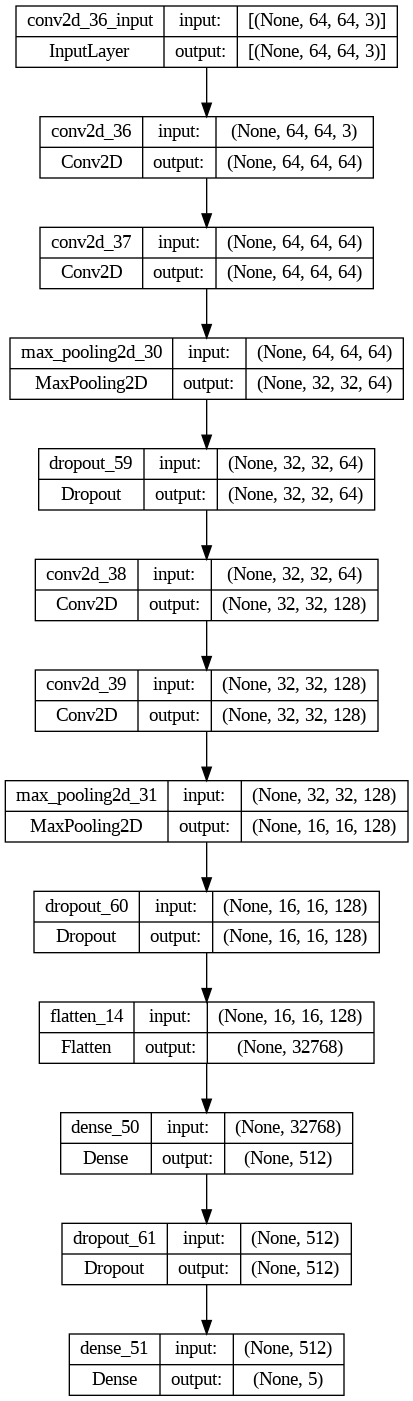

In [ ]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image
plot_model(model1, to_file='cnn.png', show_shapes=True,show_layer_names=True)
Image(filename='/content/cnn.png') 

In [ ]:
# Fits the model on batches with real-time data augmentation
hist = model1.fit_generator(datagen.flow(X_train, Y_train, batch_size=BATCH_SIZE),
               steps_per_epoch=X_train.shape[0] // BATCH_SIZE,
               epochs=EPOCHS,
               verbose=2,
               callbacks=[annealer, checkpoint,early_stop],
              #  callbacks=[checkpoint],
               validation_data=(X_val, Y_val))

Epoch 1/50


<ipython-input-205-eae5458482d4>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model1.fit_generator(datagen.flow(X_train, Y_train, batch_size=BATCH_SIZE),



Epoch 1: val_loss improved from inf to 0.95261, saving model to cnn_model.h5
202/202 - 9s - loss: 1.9150 - accuracy: 0.3475 - val_loss: 0.9526 - val_accuracy: 0.5610 - lr: 0.0010 - 9s/epoch - 46ms/step
Epoch 2/50

Epoch 2: val_loss improved from 0.95261 to 0.68958, saving model to cnn_model.h5
202/202 - 6s - loss: 0.9576 - accuracy: 0.5673 - val_loss: 0.6896 - val_accuracy: 0.6363 - lr: 0.0010 - 6s/epoch - 30ms/step
Epoch 3/50

Epoch 3: val_loss improved from 0.68958 to 0.42516, saving model to cnn_model.h5
202/202 - 7s - loss: 0.6143 - accuracy: 0.7502 - val_loss: 0.4252 - val_accuracy: 0.8237 - lr: 0.0010 - 7s/epoch - 35ms/step
Epoch 4/50

Epoch 4: val_loss improved from 0.42516 to 0.39949, saving model to cnn_model.h5
202/202 - 7s - loss: 0.5605 - accuracy: 0.7768 - val_loss: 0.3995 - val_accuracy: 0.8693 - lr: 0.0010 - 7s/epoch - 35ms/step
Epoch 5/50

Epoch 5: val_loss did not improve from 0.39949
202/202 - 5s - loss: 0.5241 - accuracy: 0.7932 - val_loss: 0.4612 - val_accuracy: 0.

In [ ]:
# computing the final loss and accuracy
#model = load_model('../output/kaggle/working/model.h5')
final_loss, final_accuracy = model.evaluate(X_val, Y_val)
print('Final Loss: {}, Final Accuracy: {}'.format(final_loss, final_accuracy))

26/26 [==============================] - 1s 21ms/step - loss: 0.6347 - accuracy: 0.7781
Final Loss: 0.6346943378448486, Final Accuracy: 0.7780517935752869


26/26 [==============================] - 0s 18ms/step


Text(0.5, 144.41374999999996, 'Predicted')

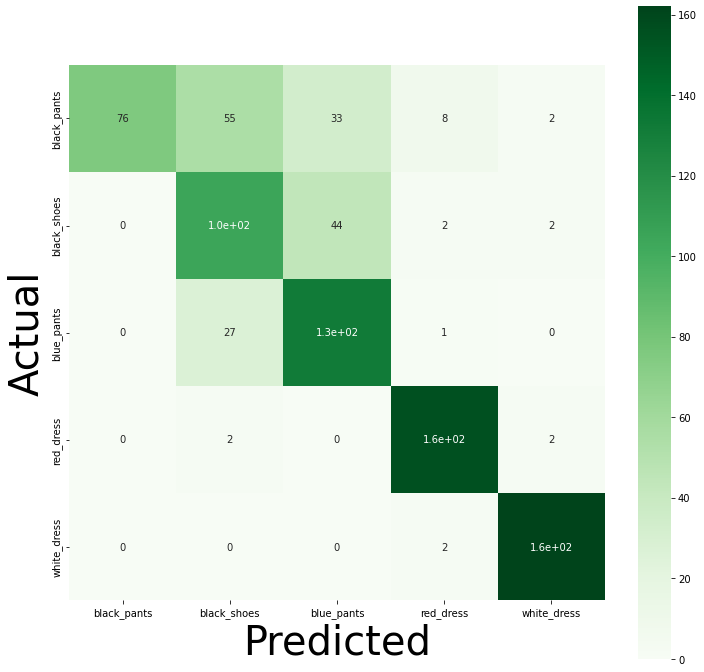

In [ ]:
#Findong and plotting the confusion matrix
Y_pred = model.predict(X_val)

Y_pred = np.argmax(Y_pred, axis=1)
Y_true = np.argmax(Y_val, axis=1)

cm = confusion_matrix(Y_true, Y_pred)
plt.figure(figsize=(12, 12))
ax = sns.heatmap(cm, cmap=plt.cm.Greens, annot=True, square=True, xticklabels=filter_apparel_type, yticklabels=filter_apparel_type)
ax.set_ylabel('Actual', fontsize=40)
ax.set_xlabel('Predicted', fontsize=40)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(Y_true, Y_pred, target_names= filter_apparel_type))

              precision    recall  f1-score   support

 black_pants       1.00      0.44      0.61       174
 black_shoes       0.56      0.69      0.61       153
  blue_pants       0.63      0.82      0.72       160
   red_dress       0.92      0.97      0.95       160
 white_dress       0.96      0.99      0.98       164

    accuracy                           0.78       811
   macro avg       0.81      0.78      0.77       811
weighted avg       0.82      0.78      0.77       811



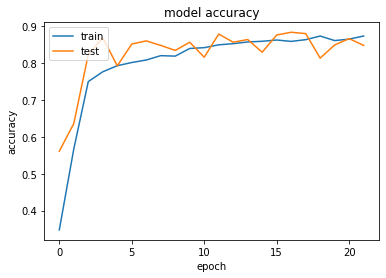

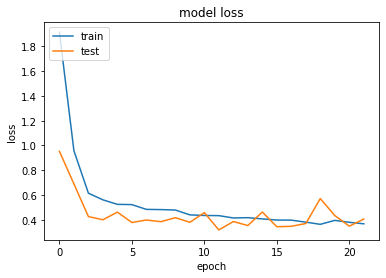

In [ ]:
# accuracy plot 
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# loss plot
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### **Model 2 - VGG19**

In [ ]:
EPOCHS = 50 
BATCH_SIZE = 16
SIZE=64
N_ch=3

In [ ]:
def build_vgg():
    vgg = VGG19(weights='imagenet', include_top=False)

    input = Input(shape=(SIZE, SIZE, N_ch))
    x = Conv2D(3, (3, 3), padding='same')(input)
    
    x = vgg(x)
    
    x = GlobalAveragePooling2D()(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
    x = Flatten()(x)
    x = Dense(512, activation='relu')(x)    
    x = Dense(256, activation='relu')(x)    
    x = Dense(64, activation='relu')(x)


    # multi output
    output = Dense(5,activation = 'softmax', name='root')(x)
 

    # model
    model = Model(input,output)
    
    optimizer = Adam(lr=0.001)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    model.summary()
    
    return model

In [ ]:
# augumenting the data and then fitting the model- (2 hours training time)
model = build_vgg()
early_stop = EarlyStopping(monitor='val_loss', patience=25, verbose=1)
# Generates batches of image data with data augmentation
datagen = ImageDataGenerator(rotation_range=90, # Degree range for random rotations
                        width_shift_range=0.2, # Range for random horizontal shifts
                        height_shift_range=0.2, # Range for random vertical shifts
                        zoom_range=0.2, # Range for random zoom
                        horizontal_flip=True, # Randomly flip inputs horizontally
                        vertical_flip=True) # Randomly flip inputs vertically

datagen.fit(X_train)

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_15 (InputLayer)       [(None, 64, 64, 3)]       0         
                                                                 
 conv2d_11 (Conv2D)          (None, 64, 64, 3)         84        
                                                                 
 vgg19 (Functional)          (None, None, None, 512)   20024384  
                                                                 
 global_average_pooling2d_5   (None, 512)              0         
 (GlobalAveragePooling2D)                                        
                                                                 
 batch_normalization_29 (Bat  (None, 512)              2048      
 chNormalization)                                                
                                                                 
 dropout_30 (Dropout)        (None, 512)               0   

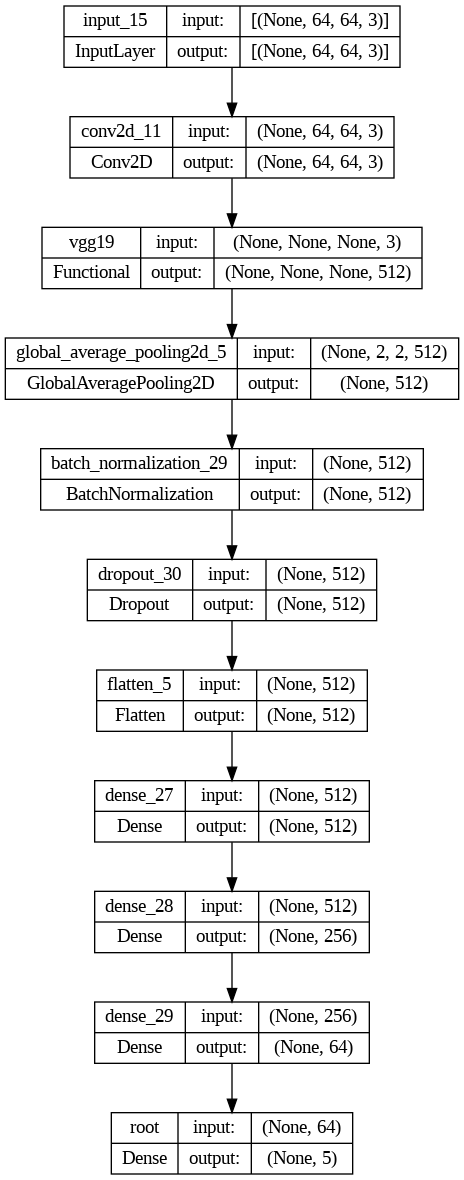

In [ ]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image
plot_model(model, to_file='vgg19.png', show_shapes=True,show_layer_names=True)
Image(filename='/content/vgg19.png') 

In [ ]:
# Fits the model on batches with real-time data augmentation
hist = model.fit_generator(datagen.flow(X_train, Y_train, batch_size=BATCH_SIZE),
               steps_per_epoch=X_train.shape[0] // BATCH_SIZE,
               epochs=EPOCHS,
               verbose=2,
               callbacks=[annealer, checkpoint,early_stop],
              #  callbacks=[checkpoint],
               validation_data=(X_val, Y_val))

Epoch 1/50


<ipython-input-164-eee6be945f95>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(datagen.flow(X_train, Y_train, batch_size=BATCH_SIZE),



Epoch 1: val_loss improved from inf to 1892.22339, saving model to vgg19_model.h5
202/202 - 19s - loss: 1.2146 - accuracy: 0.3859 - val_loss: 1892.2234 - val_accuracy: 0.2145 - lr: 0.0010 - 19s/epoch - 94ms/step
Epoch 2/50

Epoch 2: val_loss improved from 1892.22339 to 4.08857, saving model to vgg19_model.h5
202/202 - 11s - loss: 1.1183 - accuracy: 0.4684 - val_loss: 4.0886 - val_accuracy: 0.3280 - lr: 0.0010 - 11s/epoch - 52ms/step
Epoch 3/50

Epoch 3: val_loss did not improve from 4.08857
202/202 - 10s - loss: 1.0261 - accuracy: 0.5242 - val_loss: 6.6239 - val_accuracy: 0.2602 - lr: 0.0010 - 10s/epoch - 48ms/step
Epoch 4/50

Epoch 4: val_loss improved from 4.08857 to 3.72643, saving model to vgg19_model.h5
202/202 - 11s - loss: 0.9897 - accuracy: 0.5614 - val_loss: 3.7264 - val_accuracy: 0.3342 - lr: 0.0010 - 11s/epoch - 54ms/step
Epoch 5/50

Epoch 5: val_loss did not improve from 3.72643
202/202 - 10s - loss: 0.9474 - accuracy: 0.5651 - val_loss: 175238.8438 - val_accuracy: 0.3342 

In [ ]:
# computing the final loss and accuracy
#model = load_model('../output/kaggle/working/model.h5')
final_loss, final_accuracy = model.evaluate(X_val, Y_val)
print('Final Loss: {}, Final Accuracy: {}'.format(final_loss, final_accuracy))

26/26 [==============================] - 1s 22ms/step - loss: 0.6347 - accuracy: 0.7781
Final Loss: 0.6346943378448486, Final Accuracy: 0.7780517935752869


26/26 [==============================] - 1s 23ms/step


Text(0.5, 144.41374999999996, 'Predicted')

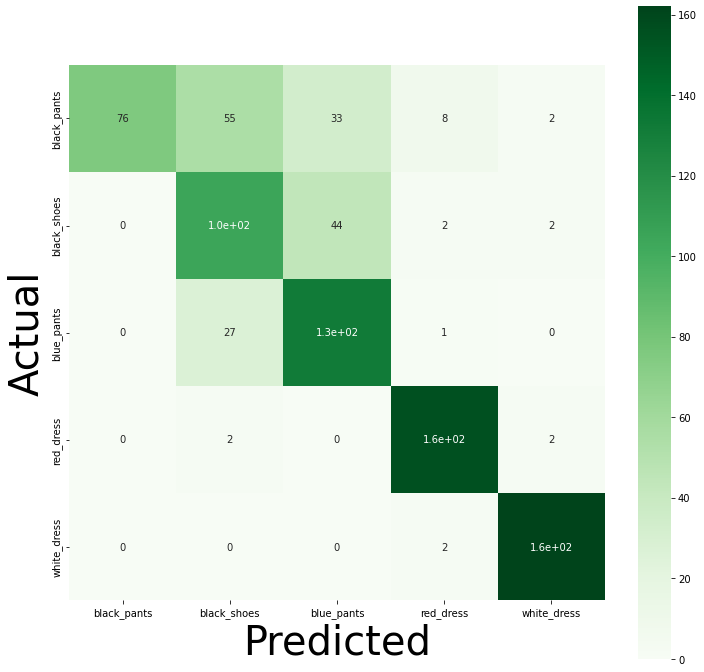

In [ ]:
#Findong and plotting the confusion matrix
Y_pred = model.predict(X_val)

Y_pred = np.argmax(Y_pred, axis=1)
Y_true = np.argmax(Y_val, axis=1)

cm = confusion_matrix(Y_true, Y_pred)
plt.figure(figsize=(12, 12))
ax = sns.heatmap(cm, cmap=plt.cm.Greens, annot=True, square=True, xticklabels=filter_apparel_type, yticklabels=filter_apparel_type)
ax.set_ylabel('Actual', fontsize=40)
ax.set_xlabel('Predicted', fontsize=40)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(Y_true, Y_pred, target_names=filter_apparel_type))

              precision    recall  f1-score   support

 black_pants       1.00      0.44      0.61       174
 black_shoes       0.56      0.69      0.61       153
  blue_pants       0.63      0.82      0.72       160
   red_dress       0.92      0.97      0.95       160
 white_dress       0.96      0.99      0.98       164

    accuracy                           0.78       811
   macro avg       0.81      0.78      0.77       811
weighted avg       0.82      0.78      0.77       811



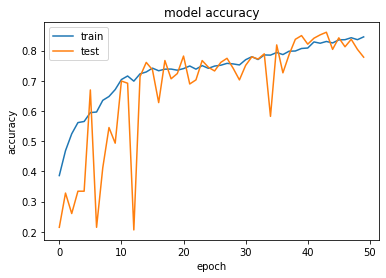

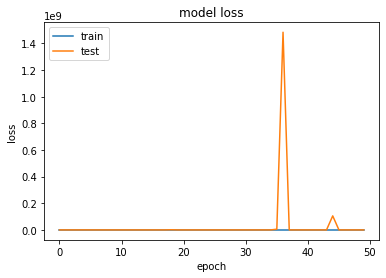

In [ ]:
# accuracy plot 
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# loss plot
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### **Model 3 - ResNet50**

In [ ]:
EPOCHS = 100 
BATCH_SIZE = 16
SIZE=64
N_ch=3

In [ ]:
def build_resnet50():
    resnet50 = ResNet50(weights='imagenet', include_top=False)

    input = Input(shape=(SIZE, SIZE, N_ch))
    x = Conv2D(3, (3, 3), padding='same')(input)
    
    x = resnet50(x)
    
    x = GlobalAveragePooling2D()(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
    x = Flatten()(x)
    x = Dense(1024, activation='relu')(x)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(256, activation='relu')(x)
    x = Dense(128, activation='relu')(x)
    x = Dense(64, activation='relu')(x)

    # multi output
    output = Dense(5,activation = 'softmax', name='root')(x)
 

    # model
    model = Model(input,output)
    
    optimizer = Adam(lr=0.001)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    model.summary()
    
    return model

In [ ]:
# augumenting the data and then fitting the model- (2 hours training time)
model = build_resnet50()
early_stop = EarlyStopping(monitor='val_loss', patience=25, verbose=1)
# Generates batches of image data with data augmentation
datagen = ImageDataGenerator(rotation_range=90, # Degree range for random rotations
                        width_shift_range=0.2, # Range for random horizontal shifts
                        height_shift_range=0.2, # Range for random vertical shifts
                        zoom_range=0.2, # Range for random zoom
                        horizontal_flip=True, # Randomly flip inputs horizontally
                        vertical_flip=True) # Randomly flip inputs vertically

datagen.fit(X_train)

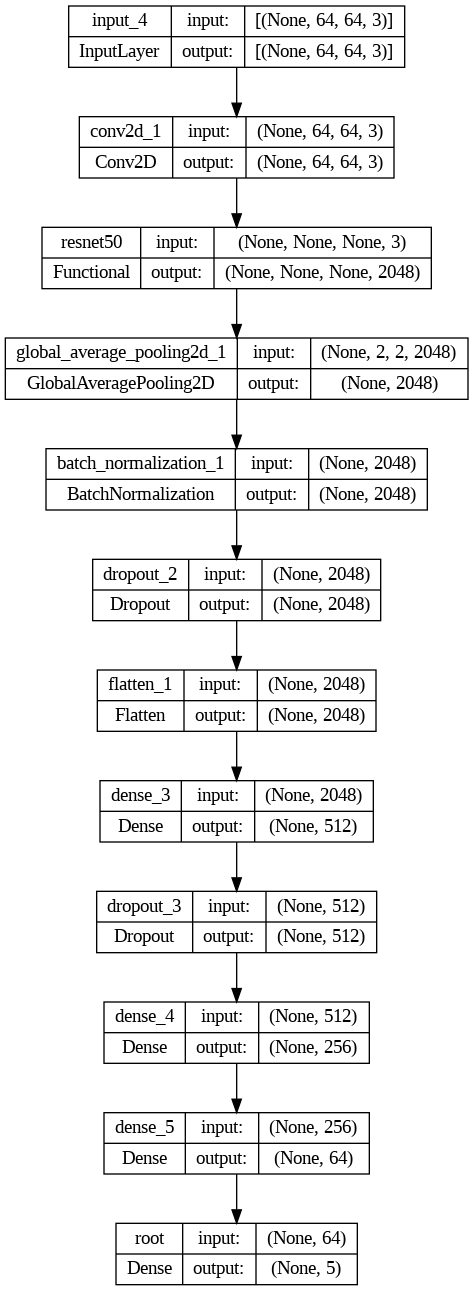

In [ ]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image
plot_model(model, to_file='resnet50.png', show_shapes=True,show_layer_names=True)
Image(filename='/content/resnet50.png') 

In [ ]:
# Fits the model on batches with real-time data augmentation
hist = model.fit_generator(datagen.flow(X_train, Y_train, batch_size=BATCH_SIZE),
               steps_per_epoch=X_train.shape[0] // BATCH_SIZE,
               epochs=EPOCHS,
               verbose=2,
               callbacks=[annealer, checkpoint,early_stop],
              #  callbacks=[checkpoint],
               validation_data=(X_val, Y_val))

Epoch 1/100


<ipython-input-46-eee6be945f95>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(datagen.flow(X_train, Y_train, batch_size=BATCH_SIZE),



Epoch 1: val_loss improved from inf to 1.71016, saving model to resnet50_model.h5
202/202 - 51s - loss: 1.1133 - accuracy: 0.5719 - val_loss: 1.7102 - val_accuracy: 0.2022 - lr: 0.0010 - 51s/epoch - 254ms/step
Epoch 2/100

Epoch 2: val_loss did not improve from 1.71016
202/202 - 11s - loss: 0.8267 - accuracy: 0.7188 - val_loss: 3.8179 - val_accuracy: 0.2145 - lr: 0.0010 - 11s/epoch - 56ms/step
Epoch 3/100

Epoch 3: val_loss did not improve from 1.71016
202/202 - 11s - loss: 0.7196 - accuracy: 0.7378 - val_loss: 2.0384 - val_accuracy: 0.3058 - lr: 0.0010 - 11s/epoch - 56ms/step
Epoch 4/100

Epoch 4: val_loss improved from 1.71016 to 0.91637, saving model to resnet50_model.h5
202/202 - 13s - loss: 0.7066 - accuracy: 0.7548 - val_loss: 0.9164 - val_accuracy: 0.6017 - lr: 0.0010 - 13s/epoch - 63ms/step
Epoch 5/100

Epoch 5: val_loss improved from 0.91637 to 0.55615, saving model to resnet50_model.h5
202/202 - 13s - loss: 0.7359 - accuracy: 0.7471 - val_loss: 0.5562 - val_accuracy: 0.8039 

In [ ]:
# computing the final loss and accuracy
#model = load_model('../output/kaggle/working/model.h5')
final_loss, final_accuracy = model.evaluate(X_val, Y_val)
print('Final Loss: {}, Final Accuracy: {}'.format(final_loss, final_accuracy))

26/26 [==============================] - 1s 19ms/step - loss: 0.8602 - accuracy: 0.7176
Final Loss: 0.8601503372192383, Final Accuracy: 0.717632532119751


26/26 [==============================] - 1s 20ms/step


Text(0.5, 144.41374999999996, 'Predicted')

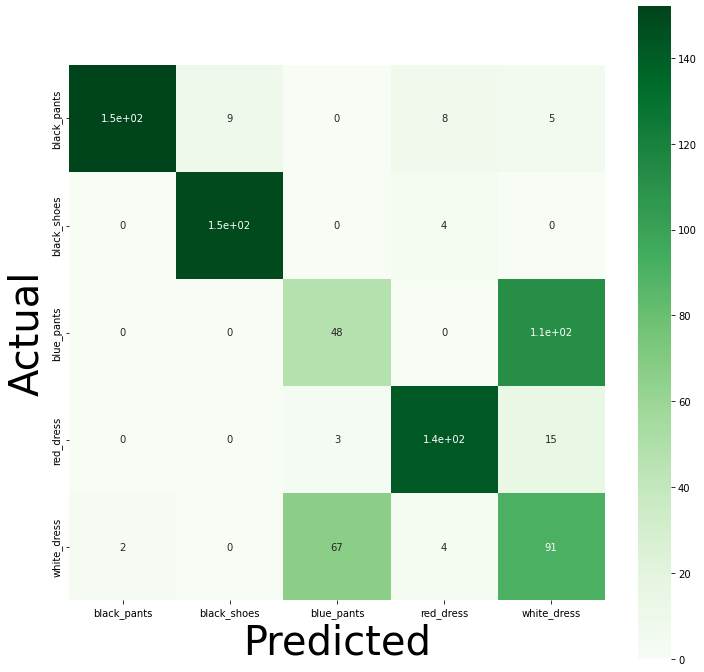

In [ ]:
#Findong and plotting the confusion matrix
Y_pred = model.predict(X_val)

Y_pred = np.argmax(Y_pred, axis=1)
Y_true = np.argmax(Y_val, axis=1)

cm = confusion_matrix(Y_true, Y_pred)
plt.figure(figsize=(12, 12))
ax = sns.heatmap(cm, cmap=plt.cm.Greens, annot=True, square=True, xticklabels=filter_apparel_type, yticklabels=filter_apparel_type)
ax.set_ylabel('Actual', fontsize=40)
ax.set_xlabel('Predicted', fontsize=40)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(Y_true, Y_pred, target_names=filter_apparel_type))

              precision    recall  f1-score   support

 black_pants       0.99      0.87      0.93       174
 black_shoes       0.94      0.97      0.96       153
  blue_pants       0.41      0.30      0.35       160
   red_dress       0.90      0.89      0.89       160
 white_dress       0.41      0.55      0.47       164

    accuracy                           0.72       811
   macro avg       0.73      0.72      0.72       811
weighted avg       0.73      0.72      0.72       811



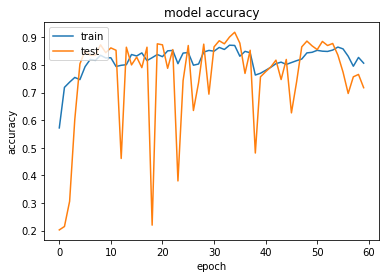

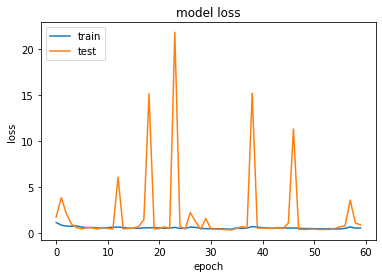

In [ ]:
# accuracy plot 
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# loss plot
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()